# Prediction of Cardiovascular Diseases Using Machine Learning Classification Models

## Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go # Generate Graphs
from plotly.subplots import make_subplots #To Create Subplots

****Preparing feature and target data****

In [243]:
X=cardio.iloc[:,0:11]

In [244]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,,,,,,,,,,,
0,50,2,168,62,110,80,1,1,0,0,1
1,55,1,156,85,140,90,3,1,0,0,1
2,51,1,165,64,130,70,3,1,0,0,0
3,48,2,169,82,150,100,1,1,0,0,1
4,47,1,156,56,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99993,52,2,168,76,120,80,1,1,1,0,1
99995,61,1,158,126,140,90,2,2,0,0,1
99996,52,2,183,105,180,90,3,1,0,1,0


In [245]:
y=cardio.iloc[:,11]

In [246]:
y

id
0        0
1        1
2        1
3        1
4        0
        ..
99993    0
99995    1
99996    1
99998    1
99999    0
Name: cardio, Length: 68983, dtype: int64

****Splitting the data into training and testing set****

In [247]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**XGBoost Classifier**

In [248]:
from xgboost import XGBClassifier
#Here we import the 'XGBClassifier' function from xgboost
model = XGBClassifier()
model.fit(X_train, y_train)
#here we fit the training data using XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

The actual testing data
  id
62903    1
30563    0
73634    1
681      0
86200    1
        ..
63702    1
68878    0
17144    1
84589    0
62017    1
Name: cardio, Length: 17246, dtype: int64


Confusion Matrix:
 [[6710 2055]
 [2619 5862]]


Accuracy is  72.9 %
Precision is  0.74
Recall is  0.69

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      8765
           1       0.74      0.69      0.71      8481

    accuracy                           0.73     17246
   macro avg       0.73      0.73      0.73     17246
weighted avg       0.73      0.73      0.73     17246

XGBoost Area Under the Curve = 0.793960494089234


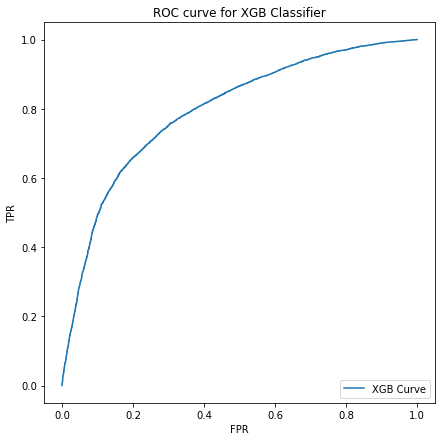

In [249]:
# Predicting the Test set results 
y_pred = model.predict(X_test)
print("The actual testing data\n ",y_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

#Evaluate Results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

#Classification report
print('\nClassification Report')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

#Plotting the curve 
from sklearn.metrics import roc_auc_score
dt_auc= roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
print("XGBoost Area Under the Curve = " +str(dt_auc))
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr, tpr, _ = roc_curve(y_test,model.predict_proba(X_test)[:,1],pos_label=1)
plt.plot(fpr,tpr,label="XGB Curve")
plt.xlabel("FPR") #plt.xlabel() is used to give the label for the x axis.
plt.ylabel("TPR") #plt.ylabel() is used to give the label for the y axis.
plt.title('ROC curve for XGB Classifier') #plt.title() is used to add title for the plot.
plt.legend(loc=4) #Create a legend for the plot element
plt.show()  #plt.show() will display the plot.



**Decision Tree Classifier**

In [250]:
from sklearn.tree import DecisionTreeClassifier
#here we import the 'DecisionTreeClassifier' function from the 'tree' subpackage of sklearn.
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
#here we fit the training data using DecisionTreeClassifier().


DecisionTreeClassifier()

The actual testing data
  id
62903    1
30563    0
73634    1
681      0
86200    1
        ..
63702    1
68878    0
17144    1
84589    0
62017    1
Name: cardio, Length: 17246, dtype: int64


Confusion Matrix:
 [[7094 1671]
 [3371 5110]]


Accuracy is  70.76 %
Precision is  0.75
Recall is  0.6

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      8765
           1       0.75      0.60      0.67      8481

    accuracy                           0.71     17246
   macro avg       0.72      0.71      0.70     17246
weighted avg       0.72      0.71      0.70     17246

Decision tree Area Under the Curve = 0.7713566037650819


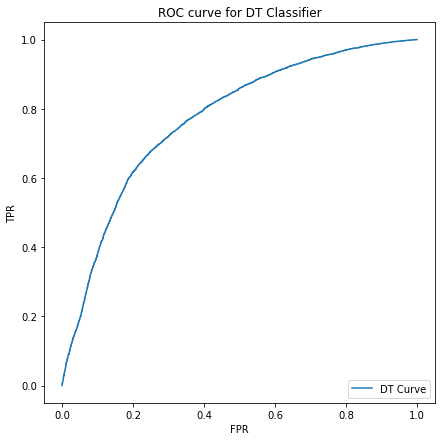

In [265]:
# Predicting the Test set results 
y_pred = clf.predict(X_test)
print("The actual testing data\n ",y_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
dt = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(dt*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

# Classification Report
print('\nClassification Report')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from sklearn.metrics import roc_auc_score
dt_auc= roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])
print("Decision tree Area Under the Curve = " +str(dt_auc))
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr, tpr, _ = roc_curve(y_test,clf.predict_proba(X_test)[:,1],pos_label=1)
plt.plot(fpr,tpr,label="DT Curve")
plt.xlabel("FPR") #plt.xlabel() is used to give the label for the x axis.
plt.ylabel("TPR") #plt.ylabel() is used to give the label for the y axis.
plt.title('ROC curve for DT Classifier') #plt.title() is used to add title for the plot.
plt.legend(loc=4) #Create a legend for the plot element
plt.show()  #plt.show() will display the plot.


**Linear Perceptron**

In [252]:
from sklearn.linear_model import Perceptron
lp = Perceptron(tol=1e-3, random_state=0)
lp.fit(X_train, y_train)
Perceptron()
lp.score(X_train, y_train)


0.5699016177977076

In [267]:
# Predicting the Test set results 
y_pred = lp.predict(X_test)
print("The actual testing data\n ",y_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)


# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
lps= accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(lps*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

#Classification report
print('\n Classification Report')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))



The actual testing data
  id
62903    1
30563    0
73634    1
681      0
86200    1
        ..
63702    1
68878    0
17144    1
84589    0
62017    1
Name: cardio, Length: 17246, dtype: int64


Confusion Matrix:
 [[8495  270]
 [7140 1341]]


Accuracy is  57.03 %
Precision is  0.83
Recall is  0.16

 Classification Report
              precision    recall  f1-score   support

           0       0.54      0.97      0.70      8765
           1       0.83      0.16      0.27      8481

    accuracy                           0.57     17246
   macro avg       0.69      0.56      0.48     17246
weighted avg       0.69      0.57      0.48     17246



**Linear SVC**

In [254]:
from sklearn.svm import LinearSVC
ls = LinearSVC(loss="hinge", random_state=42).fit(X_train, y_train)


C:\Users\rpriy\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [255]:
ls.fit(X_train, y_train)
ls.score(X_train, y_train)

C:\Users\rpriy\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.5108143108413707

In [269]:
# Predicting the Test set results 
y_pred = ls.predict(X_test)
print("The actual testing data\n ",y_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
lss = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(lss*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


#Classification Report
print('\n Classification Report')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))



The actual testing data
  id
62903    1
30563    0
73634    1
681      0
86200    1
        ..
63702    1
68878    0
17144    1
84589    0
62017    1
Name: cardio, Length: 17246, dtype: int64


Confusion Matrix:
 [[8733   32]
 [8327  154]]


Accuracy is  51.53 %
Precision is  0.83
Recall is  0.02

 Classification Report
              precision    recall  f1-score   support

           0       0.51      1.00      0.68      8765
           1       0.83      0.02      0.04      8481

    accuracy                           0.52     17246
   macro avg       0.67      0.51      0.36     17246
weighted avg       0.67      0.52      0.36     17246



# KNN Model

The actual testing data
  id
62903    1
30563    0
73634    1
681      0
86200    1
        ..
63702    1
68878    0
17144    1
84589    0
62017    1
Name: cardio, Length: 17246, dtype: int64


Confusion Matrix:
 [[6211 2554]
 [2838 5643]]


Accuracy is  68.73 %
Precision is  0.69
Recall is  0.67

 Classification Report
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      8765
           1       0.69      0.67      0.68      8481

    accuracy                           0.69     17246
   macro avg       0.69      0.69      0.69     17246
weighted avg       0.69      0.69      0.69     17246

KNN Area Under the Curve = 0.7325205639020089


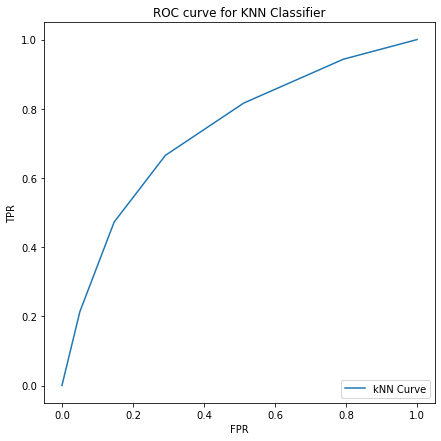

In [257]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("The actual testing data\n ",y_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
knns = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(knns*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

#Classification Report
print('\n Classification Report')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

#Plotting the curve
from sklearn.metrics import roc_auc_score
dt_auc= roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])
print("KNN Area Under the Curve = " +str(dt_auc))
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr, tpr, _ = roc_curve(y_test,knn.predict_proba(X_test)[:,1],pos_label=1)
plt.plot(fpr,tpr,label="kNN Curve")
plt.xlabel("FPR") #plt.xlabel() is used to give the label for the x axis.
plt.ylabel("TPR") #plt.ylabel() is used to give the label for the y axis.
plt.title('ROC curve for KNN Classifier') #plt.title() is used to add title for the plot.
plt.legend(loc=4) #Create a legend for the plot element
plt.show()  #plt.show() will display the plot.

# Random Forest

The actual testing data
  id
62903    1
30563    0
73634    1
681      0
86200    1
        ..
63702    1
68878    0
17144    1
84589    0
62017    1
Name: cardio, Length: 17246, dtype: int64


Confusion Matrix:
 [[5654 3111]
 [3215 5266]]


Accuracy is  63.32 %
Precision is  0.63
Recall is  0.62

 Classification Report
              precision    recall  f1-score   support

           0       0.64      0.65      0.64      8765
           1       0.63      0.62      0.62      8481

    accuracy                           0.63     17246
   macro avg       0.63      0.63      0.63     17246
weighted avg       0.63      0.63      0.63     17246

Random Forest Area Under the Curve = 0.633868148479676


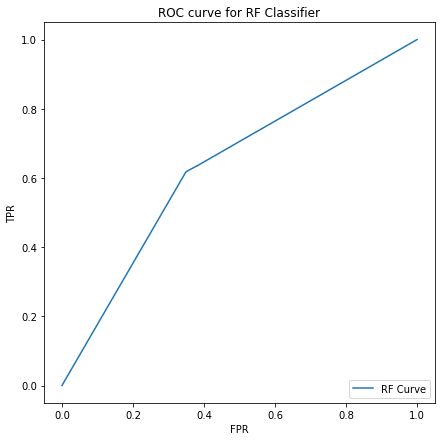

In [258]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
rfc = DecisionTreeClassifier().fit(X_train, y_train)


# Predicting the Test set results 
y_pred = rfc.predict(X_test)
print("The actual testing data\n ",y_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
rf = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(rf*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

#Classification Report
print('\n Classification Report')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

#Plotting the curve
from sklearn.metrics import roc_auc_score
dt_auc= roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1])
print("Random Forest Area Under the Curve = " +str(dt_auc))
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr, tpr, _ = roc_curve(y_test,rfc.predict_proba(X_test)[:,1],pos_label=1)
plt.plot(fpr,tpr,label="RF Curve")
plt.xlabel("FPR") #plt.xlabel() is used to give the label for the x axis.
plt.ylabel("TPR") #plt.ylabel() is used to give the label for the y axis.
plt.title('ROC curve for RF Classifier') #plt.title() is used to add title for the plot.
plt.legend(loc=4) #Create a legend for the plot element
plt.show()  #plt.show() will display the plot.#


# SVM RBF Model

In [259]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf').fit(X_train,y_train)
y_pred = svc.predict(X_test)
print("The actual testing data\n ",y_test)

# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
svrb= accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(svrb*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

#Classification Report
print('\n Classification Report')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))




The actual testing data
  id
62903    1
30563    0
73634    1
681      0
86200    1
        ..
63702    1
68878    0
17144    1
84589    0
62017    1
Name: cardio, Length: 17246, dtype: int64


Confusion Matrix:
 [[7156 1609]
 [3168 5313]]


Accuracy is  72.3 %
Precision is  0.77
Recall is  0.63

 Classification Report
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      8765
           1       0.77      0.63      0.69      8481

    accuracy                           0.72     17246
   macro avg       0.73      0.72      0.72     17246
weighted avg       0.73      0.72      0.72     17246



## NaiveBayes Classifier 

The actual testing data:
  id
62903    1
30563    0
73634    1
681      0
86200    1
        ..
63702    1
68878    0
17144    1
84589    0
62017    1
Name: cardio, Length: 17246, dtype: int64


Confusion Matrix:
 [[7094 1671]
 [3371 5110]]


Accuracy is  70.76 %
Precision is  0.75
Recall is  0.6

 Classification Report
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      8765
           1       0.75      0.60      0.67      8481

    accuracy                           0.71     17246
   macro avg       0.72      0.71      0.70     17246
weighted avg       0.72      0.71      0.70     17246

GausianNB Area Under the Curve = 0.7713566037650819


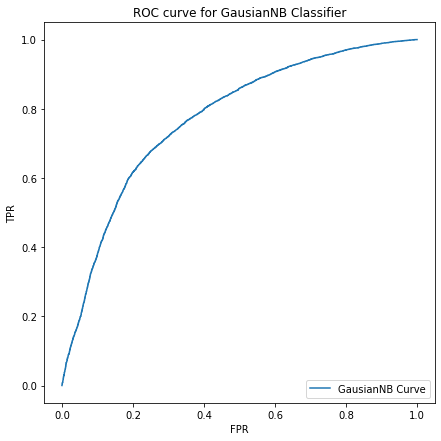

In [260]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB() 
clf.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = clf.predict(X_test)
print("The actual testing data:\n ",y_test)


# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
gnb = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(gnb*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

#Classification Report
print('\n Classification Report')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

#Plotting the ROC curve
from sklearn.metrics import roc_auc_score
dt_auc= roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])
print("GausianNB Area Under the Curve = " +str(dt_auc))
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
fpr, tpr, _ = roc_curve(y_test,clf.predict_proba(X_test)[:,1],pos_label=1)
plt.plot(fpr,tpr,label="GausianNB Curve")
plt.xlabel("FPR") #plt.xlabel() is used to give the label for the x axis.
plt.ylabel("TPR") #plt.ylabel() is used to give the label for the y axis.
plt.title('ROC curve for GausianNB Classifier') #plt.title() is used to add title for the plot.
plt.legend(loc=4) #Create a legend for the plot element
plt.show()  #plt.show() will display the plot.

# Comparing Accuracies of different Models

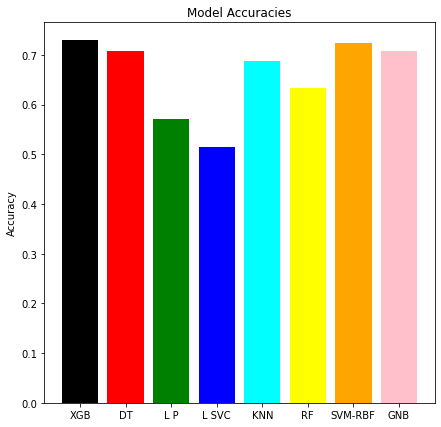

In [276]:
x='XGB'
y='DT'
j='L P'
k='L SVC'
l='KNN'
m='RF'
n='SVM-RBF'
p='GNB'

c=[x,y,j,k,l,m,n,p] 
d=[xgb,dt,lps,lss,knns,rf,svrb,gnb] 
plt.bar(c,d,color=['black', 'red', 'green', 'blue', 'cyan','yellow','orange','pink'])
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()

In [273]:
print(d)

[0.728980633190305, 0.7076423518497043, 0.5703351501797518, 0.5153078974834744, 0.6873477907920678, 0.6331903049982605]
